In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
# Download cleaned file
url = 'https://drive.usercontent.google.com/download?id=19qY6F3o63tZ01YbC3SKOQKPRwbDx5yFT&export=download&authuser=0&confirm=t'
df = pd.read_csv(url, on_bad_lines='skip')

In [6]:
# Balance the dataset to be 50/50 for status 0 and 1
status_1_sample = df[df['status']==1].sample(25_000, random_state=1)
status_0_sample = df[df['status']==0].sample(25_000, random_state=1)

full = pd.concat([status_0_sample, status_1_sample])
full

,crimeTheft,crimeViolence,crimeSexual,crimeDamage,crimeChild,crimeFraud,crimeWeapon,crimeViolation,crimeKidnap,weaponHuman,weaponGun,weaponMachine,weaponNone,weaponVerbal,weaponChemical,sitePublicArea,siteStoreRestaurant,sitePublicTransport,sitePrivateTransport,sitePrivateHome,siteAthletic,siteSchoolHospital,sitePrivateProperty,siteOnline,reportDelay,reportTimely,lat,lon,crimeCountTotal,crimeCountSixMonths,crimeDensity,crimeDensitySixMonths,crimeDensityCategory,arrestRatio,status,ami_catego,victimSex_f,victimSex_m,victimSex_x,victimDescentCategory_asian,victimDescentCategory_black,victimDescentCategory_hispanic,victimDescentCategory_native,victimDescentCategory_other,victimDescentCategory_pacific islander,victimDescentCategory_unknown,victimDescentCategory_white,victimAge_adult,victimAge_minor,victimAge_senior,victimAge_unknown
2593147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,33.9531,-118.2363,2012,61,2.000000,0.060636,medium,0.245030,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
670421,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,34.2143,-118.5534,3876,139,2.829197,0.101460,medium,0.325593,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
3007157,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,33.7324,-118.2879,5699,261,3.653205,0.167308,medium,0.337077,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
720612,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,34.2139,-118.5754,1815,72,1.369811,0.054340,low,0.308540,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
2845391,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,33.9925,-118.4186,2855,101,1.575607,0.055740,low,0.212960,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190639,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,1,34.0073,-118.2784,4769,136,3.295784,0.093988,medium,0.194380,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1424740,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,1,34.0587,-118.2330,3313,254,11.790036,0.903915,high,0.180803,1,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2410415,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,1,33.9667,-118.2856,6140,221,4.363895,0.157072,high,0.259609,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2244042,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,1,33.9956,-118.2783,3128,82,3.352626,0.087889,medium,0.210997,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [5]:
# Reduce dataframe to just these columns (open to experimentation)
reduced_cols = ['crimeTheft', 'lat', 'lon', 'crimeCountTotal', 'crimeDensitySixMonths', 'crimeCountSixMonths', 'crimeDensity', 'reportDelay', 'crimeViolence', 'weaponHuman', 'ami_catego', 'sitePrivateHome', 'crimeDamage', 'crimeWeapon', 'sitePublicArea', 'arrestRatio', 'status']
full = full[reduced_cols]
full

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status
2593147,1,33.9531,-118.2363,2012,0.060636,61,2.000000,2,0,0,0,0,0,0,0,0.245030,0
670421,1,34.2143,-118.5534,3876,0.101460,139,2.829197,0,0,0,2,1,0,0,0,0.325593,0
3007157,1,33.7324,-118.2879,5699,0.167308,261,3.653205,1,0,0,1,0,0,0,1,0.337077,0
720612,1,34.2139,-118.5754,1815,0.054340,72,1.369811,0,0,0,2,0,0,0,1,0.308540,0
2845391,1,33.9925,-118.4186,2855,0.055740,101,1.575607,0,0,0,1,0,0,0,1,0.212960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190639,0,34.0073,-118.2784,4769,0.093988,136,3.295784,-1,1,0,0,0,0,1,1,0.194380,1
1424740,0,34.0587,-118.2330,3313,0.903915,254,11.790036,-1,0,0,4,0,1,0,0,0.180803,1
2410415,0,33.9667,-118.2856,6140,0.157072,221,4.363895,-1,1,1,0,1,0,0,0,0.259609,1
2244042,0,33.9956,-118.2783,3128,0.087889,82,3.352626,-1,0,0,1,0,1,0,0,0.210997,1


In [10]:
# Split data into X and y (features and target variable)
X = full.drop(columns=['status'])
y = full['status']

# Split into train/test sets
# 'stratify' makes sure that the ratio of 1s to 0s is maintained in the split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [11]:
# Scale data with StandardScaler

#scale_columns = ['lat', 'lon', 'crimeCountTotal', 'crimeCountSixMonths', 'crimeDensity', 'crimeDensitySixMonths', 'reportDelay']
#scale_columns = ['lat', 'lon', 'crimeCountTotal', 'crimeCountSixMonths', 'crimeDensity', 'crimeDensitySixMonths', 'arrestRatio', 'reportDelay']

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

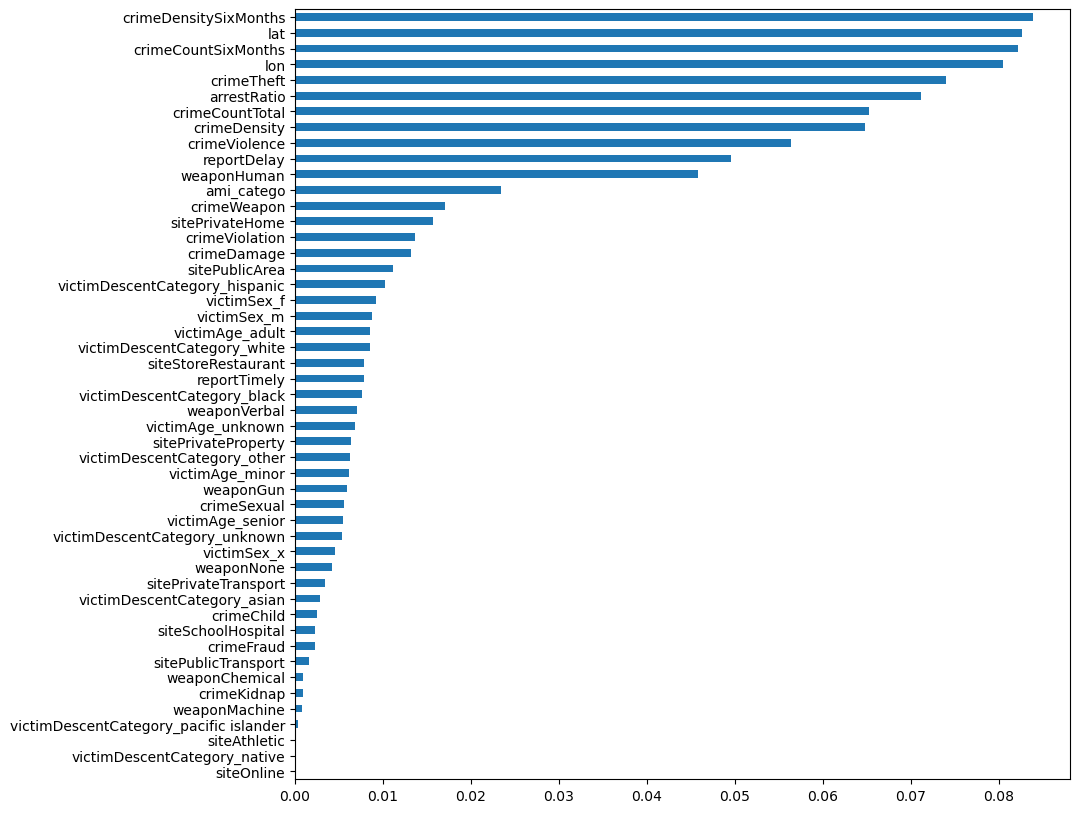

In [12]:
# See feature importance
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train_scaled, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10))
plt.show()

In [13]:
# Try RandomForest with different criterion arguments
for criterion in ['gini', 'entropy', 'log_loss']:
    for estimators in [16, 32, 64, 128, 256]:
        model = RandomForestClassifier(n_estimators=estimators, criterion=criterion, random_state=1, class_weight='balanced')
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        print(f'Criterion: {criterion} - Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Criterion: gini - Estimators: 16 - Accuracy: 0.72984
Criterion: gini - Estimators: 32 - Accuracy: 0.73744
Criterion: gini - Estimators: 64 - Accuracy: 0.74096
Criterion: gini - Estimators: 128 - Accuracy: 0.74264
Criterion: gini - Estimators: 256 - Accuracy: 0.74336
Criterion: entropy - Estimators: 16 - Accuracy: 0.73112
Criterion: entropy - Estimators: 32 - Accuracy: 0.73784


In [12]:
# Try SVC with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel, random_state=1)  # or 'rbf' for non-linear
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Kernel: {kernel} - Accuracy: {accuracy_score(y_test, preds)}')

Kernel: linear - Accuracy: 0.7338
Kernel: poly - Accuracy: 0.7414
Kernel: rbf - Accuracy: 0.7414
Kernel: sigmoid - Accuracy: 0.6302


In [8]:
# Try XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.7306

In [14]:
# Try AdaBoost with different estimators
from sklearn.ensemble import AdaBoostClassifier
for estimators in [16, 32, 64, 128, 256]:
    for learnrate in [1.0, 0.1, .01, .001]:
        model = AdaBoostClassifier(n_estimators=estimators, algorithm='SAMME', learning_rate=learnrate, random_state=1)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        print(f'Estimators: {estimators} - Learn Rate: {learnrate} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: 16 - Learn Rate: 1.0 - Accuracy: 0.741
Estimators: 16 - Learn Rate: 0.1 - Accuracy: 0.7122
Estimators: 16 - Learn Rate: 0.01 - Accuracy: 0.7122
Estimators: 16 - Learn Rate: 0.001 - Accuracy: 0.7122
Estimators: 32 - Learn Rate: 1.0 - Accuracy: 0.741
Estimators: 32 - Learn Rate: 0.1 - Accuracy: 0.7342
Estimators: 32 - Learn Rate: 0.01 - Accuracy: 0.7122
Estimators: 32 - Learn Rate: 0.001 - Accuracy: 0.7122
Estimators: 64 - Learn Rate: 1.0 - Accuracy: 0.741
Estimators: 64 - Learn Rate: 0.1 - Accuracy: 0.738
Estimators: 64 - Learn Rate: 0.01 - Accuracy: 0.7122
Estimators: 64 - Learn Rate: 0.001 - Accuracy: 0.7122
Estimators: 128 - Learn Rate: 1.0 - Accuracy: 0.7412
Estimators: 128 - Learn Rate: 0.1 - Accuracy: 0.7414
Estimators: 128 - Learn Rate: 0.01 - Accuracy: 0.7122
Estimators: 128 - Learn Rate: 0.001 - Accuracy: 0.7122
Estimators: 256 - Learn Rate: 1.0 - Accuracy: 0.7412
Estimators: 256 - Learn Rate: 0.1 - Accuracy: 0.74
Estimators: 256 - Learn Rate: 0.01 - Accuracy: 0.712

In [10]:
# Try ExtraTrees with different estimators
from sklearn.ensemble import ExtraTreesClassifier
for estimators in [16, 32, 64, 128, 256]:
    model = ExtraTreesClassifier(n_estimators=estimators, random_state=1)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: 16 - Accuracy: 0.6978
Estimators: 32 - Accuracy: 0.7014
Estimators: 64 - Accuracy: 0.704
Estimators: 128 - Accuracy: 0.7038
Estimators: 256 - Accuracy: 0.7062


In [11]:
# Try Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, preds)}')

Accuracy: 0.7244


In [41]:
# Ensembling via democracy
# Multiple models make predictions
# All models 'vote' on predictions
# Slight improvement to accuracy

rf = RandomForestClassifier(n_estimators=64, criterion='log_loss', random_state=1)
svc = SVC(kernel='rbf', random_state=1)
xgb = XGBClassifier(random_state=1)
ada = AdaBoostClassifier(n_estimators=128, algorithm='SAMME', learning_rate=0.1, random_state=1)
gnb = GaussianNB()


all_preds = []
for model in [rf, svc, xgb, ada, gnb]:
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    all_preds.append(preds)

summed_preds = np.sum(all_preds, axis=0)
for i in range(1,6):
    summed_preds_x = np.where(summed_preds >= i, 1, 0)
    print(f'Must match {i}: {accuracy_score(y_test, summed_preds_x)}')

Must match 1: 0.73576
Must match 2: 0.74712
Must match 3: 0.74336
Must match 4: 0.73592
Must match 5: 0.71056


In [42]:
print(classification_report(y_test, np.where(summed_preds >= 2, 1, 0)))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      6250
           1       0.73      0.77      0.75      6250

    accuracy                           0.75     12500
   macro avg       0.75      0.75      0.75     12500
weighted avg       0.75      0.75      0.75     12500



In [43]:
X_scaled = scaler.transform(X)

all_preds = []
for model in [rf, svc, xgb, ada, gnb]:
    preds = model.predict(X_scaled)
    all_preds.append(preds)

summed_preds = np.sum(all_preds, axis=0)
final_preds = np.where(summed_preds >= 2, 1, 0)
print(classification_report(y, final_preds))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     25000
           1       0.76      0.82      0.79     25000

    accuracy                           0.78     50000
   macro avg       0.78      0.78      0.78     50000
weighted avg       0.78      0.78      0.78     50000



In [44]:
full['pred'] = final_preds
full

C:\Users\Alex School\AppData\Local\Temp\ipykernel_42572\3156123904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['pred'] = final_preds


,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status,pred
2593147,1,33.9531,-118.2363,2012,0.060636,61,2.000000,2,0,0,0,0,0,0,0,0.245030,0,0
670421,1,34.2143,-118.5534,3876,0.101460,139,2.829197,0,0,0,2,1,0,0,0,0.325593,0,0
3007157,1,33.7324,-118.2879,5699,0.167308,261,3.653205,1,0,0,1,0,0,0,1,0.337077,0,0
720612,1,34.2139,-118.5754,1815,0.054340,72,1.369811,0,0,0,2,0,0,0,1,0.308540,0,0
2845391,1,33.9925,-118.4186,2855,0.055740,101,1.575607,0,0,0,1,0,0,0,1,0.212960,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190639,0,34.0073,-118.2784,4769,0.093988,136,3.295784,-1,1,0,0,0,0,1,1,0.194380,1,1
1424740,0,34.0587,-118.2330,3313,0.903915,254,11.790036,-1,0,0,4,0,1,0,0,0.180803,1,1
2410415,0,33.9667,-118.2856,6140,0.157072,221,4.363895,-1,1,1,0,1,0,0,0,0.259609,1,1
2244042,0,33.9956,-118.2783,3128,0.087889,82,3.352626,-1,0,0,1,0,1,0,0,0.210997,1,0


In [45]:
wrongs = full[full['status']!=full['pred']]
rights = full[full['status']==full['pred']]

In [46]:
wrongs

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status,pred
2217513,0,33.9990,-118.3089,5116,0.153430,170,4.617329,-1,0,1,1,0,0,0,1,0.218530,0,1
440791,0,34.1980,-118.4216,1916,0.057500,69,1.596667,-1,1,0,1,0,0,1,1,0.312109,0,1
2515559,0,33.9467,-118.2871,5041,0.159693,187,4.304868,-1,1,1,1,1,0,0,0,0.220790,0,1
115986,0,34.2761,-118.4906,1619,0.063344,61,1.681205,-1,1,0,4,0,0,1,0,0.239036,0,1
1642628,0,34.0546,-118.2684,2884,0.089410,103,2.503472,-1,1,1,1,0,0,0,0,0.294036,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289872,1,34.2283,-118.4677,2405,0.078629,78,2.424395,0,0,0,1,0,0,0,0,0.303534,1,0
1519152,1,34.0446,-118.2490,4319,0.146235,167,3.781961,-1,0,0,0,0,0,0,1,0.243343,1,0
1644978,1,34.0509,-118.2642,3710,0.051822,91,2.112756,1,0,0,2,1,0,0,0,0.219677,1,0
713007,1,34.1974,-118.5928,3095,0.078307,74,3.275132,0,0,0,2,0,0,0,1,0.279160,1,0


In [47]:
wrongs.describe()

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status,pred
count,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.00000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000,10898.000000
mean,0.402184,34.070108,-118.352402,4109.918609,0.240733,143.757295,5.855599,17.379152,0.355478,0.329051,1.59800,0.309139,0.083318,0.137640,0.405487,0.225722,0.421270,0.578730
std,0.490361,0.113567,0.102532,3012.004728,1.138121,111.845583,22.318351,162.730430,0.478680,0.469890,1.25744,0.462160,0.276375,0.344537,0.491009,0.051566,0.493785,0.493785
min,0.000000,33.342700,-118.667300,6.000000,0.000361,1.000000,0.003665,-1.000000,0.000000,0.000000,-1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.003300,-118.425525,2341.000000,0.060200,78.000000,1.786307,-1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.191866,0.000000,0.000000
50%,0.000000,34.056200,-118.319000,3279.000000,0.090537,114.000000,2.602031,-1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.221602,0.000000,1.000000
75%,1.000000,34.163100,-118.276300,5043.000000,0.139588,174.000000,4.015081,0.000000,1.000000,1.000000,2.00000,1.000000,0.000000,0.000000,1.000000,0.259609,1.000000,1.000000
max,1.000000,34.327500,-118.127800,22140.000000,12.000000,1297.000000,220.000000,4383.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,0.408415,1.000000,1.000000


In [48]:
rights.describe()

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status,pred
count,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000,39102.000000
mean,0.462611,34.079643,-118.359735,3901.654340,0.245590,137.254002,5.978198,22.505805,0.329139,0.323564,1.642576,0.390875,0.086108,0.110583,0.368549,0.229325,0.521943,0.521943
std,0.498606,0.117739,0.106554,2996.416878,1.174341,117.145349,23.592679,169.854955,0.469907,0.467842,1.263971,0.487953,0.280527,0.313619,0.482417,0.054379,0.499525,0.499525
min,0.000000,33.706000,-118.666700,1.000000,0.000365,1.000000,0.000499,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.014600,-118.438000,2189.000000,0.056135,73.000000,1.678912,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.193061,0.000000,0.000000
50%,0.000000,34.064100,-118.329400,3105.000000,0.084103,107.000000,2.446381,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.225588,1.000000,1.000000
75%,1.000000,34.179400,-118.278000,4769.000000,0.130866,163.000000,3.718563,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.269588,1.000000,1.000000
max,1.000000,34.376700,-117.950200,22140.000000,12.000000,1416.000000,220.000000,4276.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.600000,1.000000,1.000000


In [49]:
wrongs[wrongs['status']==1].describe()

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status,pred
count,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.0,4591.000000,4591.000000,4591.0,4591.0
mean,0.883032,34.081839,-118.367881,4145.424962,0.295072,146.381616,6.848472,11.262688,0.001307,0.043999,1.768242,0.204531,0.114572,0.0,0.440863,0.221648,1.0,0.0
std,0.321417,0.112450,0.104793,3309.012618,1.387468,122.858290,26.788593,93.816324,0.036131,0.205116,1.322951,0.403402,0.318539,0.0,0.496545,0.052606,0.0,0.0
min,0.000000,33.707900,-118.656300,24.000000,0.000658,1.000000,0.020924,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.0,0.000000,0.089109,1.0,0.0
25%,1.000000,34.017400,-118.444100,2335.000000,0.058277,78.000000,1.721488,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.183452,1.0,0.0
50%,1.000000,34.067800,-118.344000,3194.000000,0.086603,112.000000,2.498539,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.217764,1.0,0.0
75%,1.000000,34.175350,-118.284200,4931.000000,0.135897,171.000000,3.820677,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,1.000000,0.257150,1.0,0.0
max,1.000000,34.325600,-118.158800,22140.000000,12.000000,1297.000000,220.000000,2885.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.0,1.000000,0.408415,1.0,0.0


In [50]:
wrongs[wrongs['status']==0].describe()

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status,pred
count,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.0
mean,0.052164,34.061568,-118.341134,4084.072776,0.201179,141.846995,5.132865,21.831457,0.613287,0.536547,1.474076,0.385286,0.060568,0.237831,0.379737,0.228686,0.0,1.0
std,0.222376,0.113623,0.099358,2775.880480,0.912925,103.060125,18.362023,198.259906,0.487036,0.498702,1.192435,0.486701,0.238554,0.425789,0.485360,0.050594,0.0,0.0
min,0.000000,33.342700,-118.667300,6.000000,0.000361,1.000000,0.003665,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.000000,33.994700,-118.404400,2357.000000,0.061969,78.000000,1.853217,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.194915,0.0,1.0
50%,0.000000,34.048700,-118.306800,3313.000000,0.093467,116.000000,2.729862,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.224730,0.0,1.0
75%,0.000000,34.135050,-118.271700,5101.000000,0.142251,176.000000,4.119573,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.261683,0.0,1.0
max,1.000000,34.327500,-118.127800,22140.000000,12.000000,1124.000000,220.000000,4383.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.408415,0.0,1.0


In [51]:
print(len(wrongs[wrongs['status']==0]))
print(len(wrongs[wrongs['status']==1]))

6307
4591
